# Importación de librerías

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt

# Función de activación

In [ ]:
def func_activacion(x):
  return 1 if x>=0 else -1
func_activacion_vect = np.vectorize(func_activacion)

# Arquitectura de la RNA BAM

In [ ]:
def producto(x,y):
  # adaptar vectores
  x_entrada = x.reshape(-1,1).T 
  y_salida = y.reshape(-1,1).T
  # transpuesta de x
  x_transpuesta = x.reshape(-1,1) 
  # realizar el producto
  return np.dot(x_transpuesta,y_salida)  

In [ ]:
def rna_bam(entradas_x,salidas_y):
  # generar una matriz de 0
  dim_filas = len(entradas_x[0])
  dim_columnas = len(salidas_y[0])
  # matriz de ceros para almacenar los resultados de los productos
  matriz_suma = np.zeros((dim_filas, dim_columnas))

  # PASO 1

  # iterar por cada dato de entrada y salida
  for i in range(len(entradas_x)):
    # aplicar producto para dichos datos
    result_prod = producto(entradas_x[i],salidas_y[i])
    
    # PASO 2
    
    # sumar resultados
    matriz_suma = np.add(matriz_suma, result_prod)

  return matriz_suma

In [ ]:
def prediccion_bam(patrones, w_bam):
  lista_resultados = []
  # iterar para cada patron
  for patron in patrones: # el patron es A
    flag = True
    i = 0 # para que en la 1ra iteracion no haga la comparacion
    while flag: # iterar mientras no hay convergencia
      
      # CALCULANDO  "B"
      # patron X Wpesos y luego func acti
      prod_B = np.dot(patron,w_bam)
      salida_B = func_activacion_vect(prod_B) 

      # CALCULANDO  "A"
      prod_A = np.dot(salida_B,w_bam.T) 
      patron_A = func_activacion_vect(prod_A) # nuevo valor de A

      if i!=0: # no comparar en la 1ra iteracion

        # COMPARACION
        if (patron==patron_A).all() and (salida_anterior==salida_B).all():
          lista_resultados.append((patron_A,salida_B))
          flag = False

      # almacenar los valores calculados
      i+=1
      patron = patron_A
      salida_anterior = salida_B
  return lista_resultados

# DETECCION DE VOCALES

## PROPUESTA 1

In [ ]:
# VOCALES
X_train = np.array([[ 1,  1,  1,  1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1,  1,  1,  1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1], 
                    [ 1,  1,  1,  1,  1,
                      1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1,
                      1,  1,  1,  1, -1,
                      1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1,
                      1,  1,  1,  1,  1], 
                    [  1,  1,  1,  1,  1,
                      -1, -1,  1, -1, -1,
                      -1, -1,  1, -1, -1,
                      -1, -1,  1, -1, -1,
                      -1, -1,  1, -1, -1,
                      -1, -1,  1, -1, -1,
                       1,  1,  1,  1,  1], 
                    [  1,  1,  1,  1,  1,
                       1, -1, -1, -1,  1,
                       1, -1, -1, -1,  1,
                       1, -1, -1, -1,  1,
                       1, -1, -1, -1,  1,
                       1, -1, -1, -1,  1,
                       1,  1,  1,  1,  1], 
                    [ 1, -1, -1, -1,  1,
                        1, -1, -1, -1,  1,
                        1, -1, -1, -1,  1,
                        1, -1, -1, -1,  1,
                        1, -1, -1, -1,  1,
                        1, -1, -1, -1,  1,
                        1,  1,  1,  1,  1]])

Y_train = np.array([[-1, -1, -1, -1, 1],[-1, -1, -1, 1, -1],
                    [-1, -1,  1, -1,-1],[-1,  1, -1,-1, -1],
                    [1, -1, -1, -1, -1]])

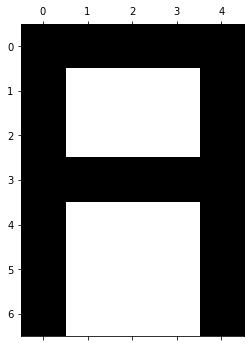

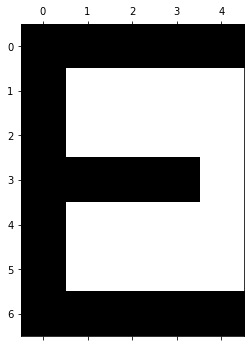

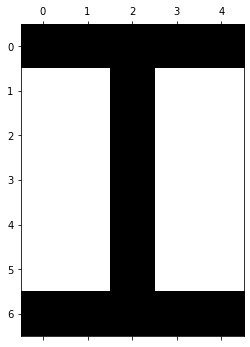

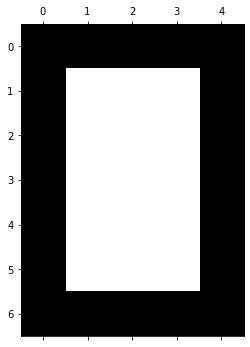

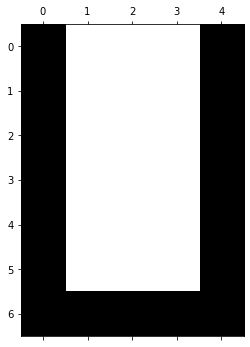

In [ ]:
# =============== GRAFICANDO DATOS DE ENTRENAMIENTO ===================
# GRAFICANDO IMAGEN A PREDECIR
for i in range(5):
  plt.matshow(np.reshape(X_train[i], (7, 5)), cmap=plt.cm.binary)
  plt.show()

In [ ]:
X_predict = np.array([[ 1,  1, -1,  1, 1,
                       -1, -1, -1, -1, 1,
                        1, -1, -1, -1, 1,
                        1,  1,  1,  1, 1,
                        1, -1, -1,  1,-1,
                        1, -1, -1,  1, 1,
                        1, -1, -1, -1, 1], 
                      [-1,  1,  1,  1,  1,
                        1,  1, -1, -1, -1,
                        1, -1, -1, -1, -1,
                        1,  1,  1,  1, -1,
                        1, -1, -1, -1, -1,
                        1, -1,  1,  1, -1,
                       -1,  1,  1,  1,  1], 
                      [ -1,  1,  1,  1, -1,
                        -1, -1,  1, -1, -1,
                        -1, -1,  1, -1, -1,
                        -1, -1,  1, -1, -1,
                        -1, -1,  1, -1, -1,
                        -1, -1,  1, -1, -1,
                        1,  1,  1,  -1,  1], 
                      [  1,  1,-1,  1,  1,
                        1, -1,  1, -1,  1,
                        1, -1, -1, -1,  1,
                        1, -1, -1, -1,  1,
                        1, -1, -1,  1, -1,
                        1,  1, -1, -1,  1,
                       -1,  1,  1,  1,  1], 
                      [ 1,  1, -1, -1,  1,
                        1,  1, -1,  1,  1,
                        1, -1, -1,  1,  1,
                        1, -1, -1, -1,  1,
                        1, -1, -1, -1,  1,
                        1, -1,  1, -1,  1,
                        1,  1,  1,  1,  1]])

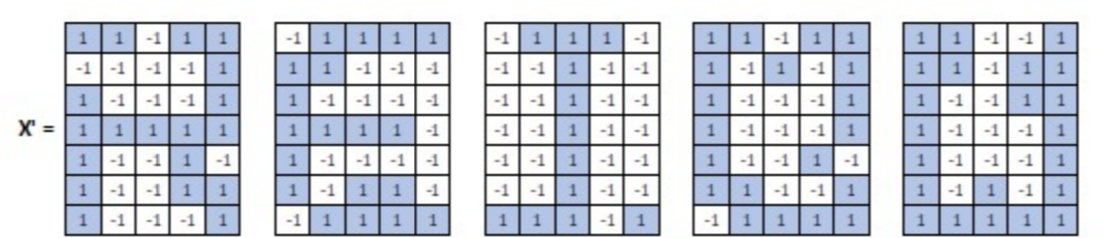

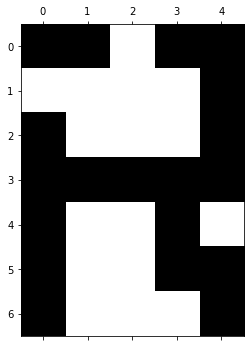

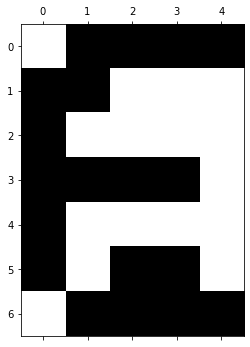

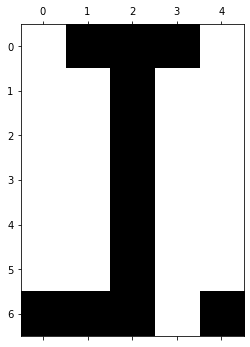

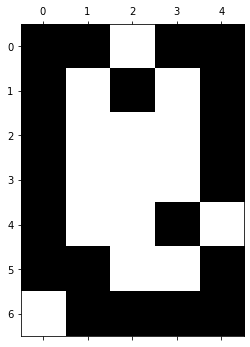

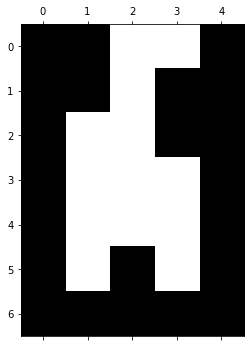

In [ ]:
# GRAFICANDO IMAGEN A PREDECIR
for i in range(5):
  plt.matshow(np.reshape(X_predict[i], (7, 5)), cmap=plt.cm.binary)
  plt.show()

In [ ]:
# ============= ENTRENAMIENTO ==============
w_bam = rna_bam(X_train,Y_train)

In [ ]:
print(w_bam)

[[-3. -3. -3. -3. -3.]
 [-5. -1. -1. -1. -1.]
 [-5. -1. -1. -1. -1.]
 [-5. -1. -1. -1. -1.]
 [-3. -3. -3. -3. -3.]
 [-1. -1. -5. -1. -1.]
 [ 3.  3.  3.  3.  3.]
 [ 1.  1.  5.  1.  1.]
 [ 3.  3.  3.  3.  3.]
 [ 1.  1. -3. -3.  1.]
 [-1. -1. -5. -1. -1.]
 [ 3.  3.  3.  3.  3.]
 [ 1.  1.  5.  1.  1.]
 [ 3.  3.  3.  3.  3.]
 [ 1.  1. -3. -3.  1.]
 [-1. -1. -5. -1. -1.]
 [-1. -1. -1.  3.  3.]
 [-3. -3.  1.  1.  1.]
 [-1. -1. -1.  3.  3.]
 [ 1.  1. -3. -3.  1.]
 [-1. -1. -5. -1. -1.]
 [ 3.  3.  3.  3.  3.]
 [ 1.  1.  5.  1.  1.]
 [ 3.  3.  3.  3.  3.]
 [ 1.  1. -3. -3.  1.]
 [-1. -1. -5. -1. -1.]
 [ 3.  3.  3.  3.  3.]
 [ 1.  1.  5.  1.  1.]
 [ 3.  3.  3.  3.  3.]
 [ 1.  1. -3. -3.  1.]
 [-3. -3. -3. -3. -3.]
 [-1. -1. -1. -1. -5.]
 [-1. -1. -1. -1. -5.]
 [-1. -1. -1. -1. -5.]
 [-3. -3. -3. -3. -3.]]


In [ ]:
# ============== PREDICCION ================
resultados_pred = prediccion_bam(X_predict,w_bam)

# extraer los resultados
resultados = []
for result, pred in resultados_pred:
  resultados.append(result)

# DATOS DE SALIDA

In [ ]:
# MOSTRAR RESULTADOS
y_pred_ = []
for patron, salida in resultados_pred:
  y_pred_.append(salida)
  print(" SALIDA: ", salida, "\n")

 SALIDA:  [-1 -1 -1 -1 -1] 

 SALIDA:  [-1 -1 -1 -1 -1] 

 SALIDA:  [-1 -1  1 -1 -1] 

 SALIDA:  [-1 -1 -1 -1 -1] 

 SALIDA:  [-1 -1 -1 -1 -1] 



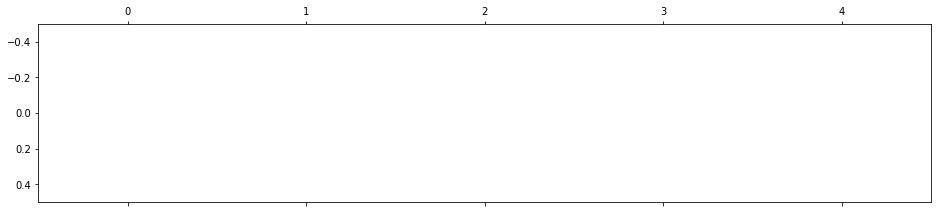

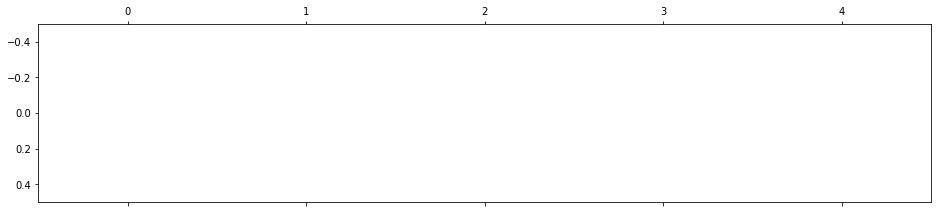

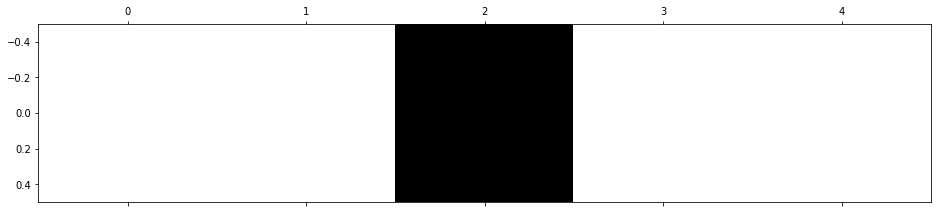

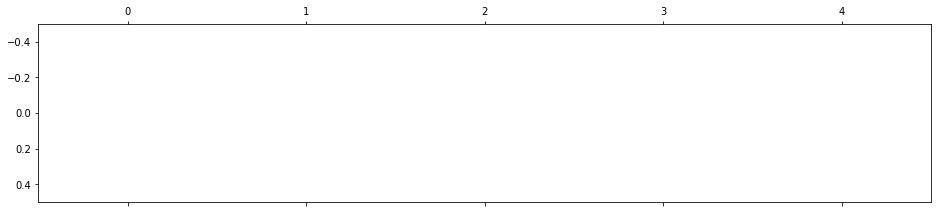

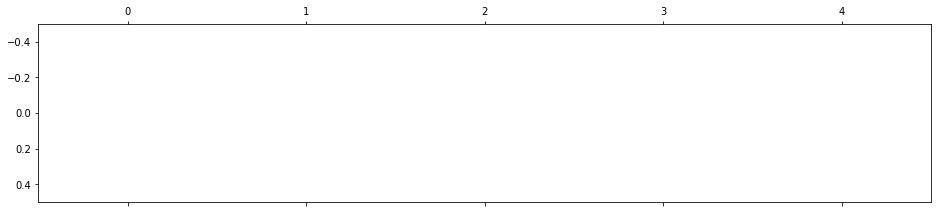

In [ ]:
# =========== graficar resultados ==========
for i in range(0,5):
  plt.matshow(np.reshape(y_pred_[i], (1, 5)), cmap=plt.cm.binary)
  plt.show()

In [ ]:
# =========== graficar resultados ==========
for i in range(0,5):
  plt.matshow(np.reshape(resultados[i], (7, 5)), cmap=plt.cm.binary)
  plt.show()

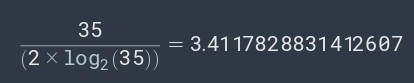

## PROPUESTA 2

In [ ]:
# VOCALES
X_train2 = np.array([[ 1,  1,  1,  1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1,  1,  1,  1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1,
                      1, -1, -1, -1, 1], 
                    [ 1,  1,  1,  1,  1,
                      1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1,
                      1,  1,  1,  1, -1,
                      1, -1, -1, -1, -1,
                      1, -1, -1, -1, -1,
                      1,  1,  1,  1,  1], 
                    [  1,  1,  1,  1,  1,
                      -1, -1,  1, -1, -1,
                      -1, -1,  1, -1, -1,
                      -1, -1,  1, -1, -1,
                      -1, -1,  1, -1, -1,
                      -1, -1,  1, -1, -1,
                       1,  1,  1,  1,  1], 
                      [-1, -1,-1,-1,  -1,
                       -1,  1,  1,  1,   1,
                       -1,  1, -1, -1,   1,
                       -1,  1, -1, -1,   1,
                       -1,  1, -1, -1,   1,
                       -1,  1, -1, -1,   1,
                       -1,   1,  1,  1,   1], 
                    [   1, -1, -1, -1,   1,
                        1, -1, -1, -1,   1,
                        1, -1, -1, -1,   1,
                        1, -1, -1, -1,   1,
                        1, -1, -1, -1,   1,
                        1, -1, -1, -1,   1,
                        1,   1,  1,  1,   1]])

Y_train2 = np.array([[-1, -1, -1, -1, 1],[-1, -1, -1, 1, -1],
                    [-1, -1,  1, -1,-1],[-1,  1, -1,-1, -1],
                    [1, -1, -1, -1, -1]])

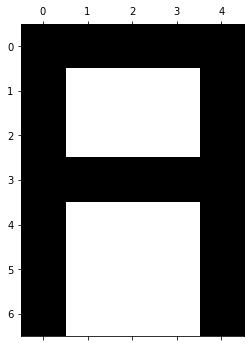

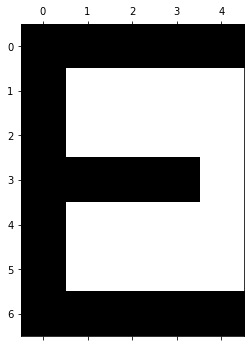

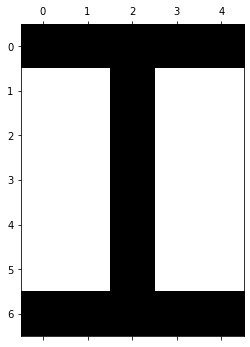

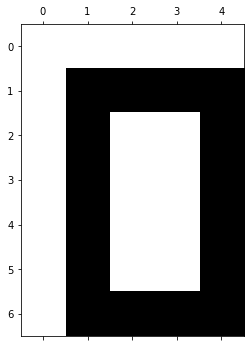

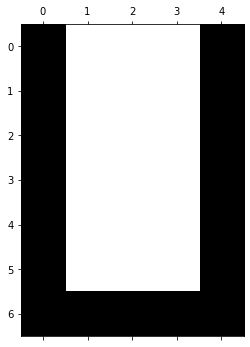

In [ ]:
# =============== GRAFICANDO DATOS DE ENTRENAMIENTO 2 ===================
# GRAFICANDO IMAGEN A PREDECIR
for i in range(5):
  plt.matshow(np.reshape(X_train2[i], (7, 5)), cmap=plt.cm.binary)
  plt.show()

In [ ]:
# ============= ENTRENAMIENTO 2 ==============
w_bam2 = rna_bam(X_train2,Y_train2)

In [ ]:
# ============== PREDICCION 2 ================
resultados_pred2 = prediccion_bam(X_predict,w_bam2)
# extraer los resultados
resultados2 = []
for result, pred in resultados_pred2:
  resultados2.append(result)

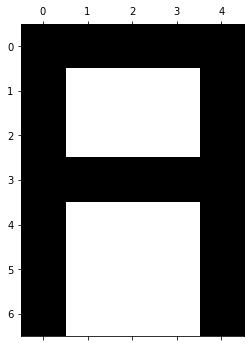

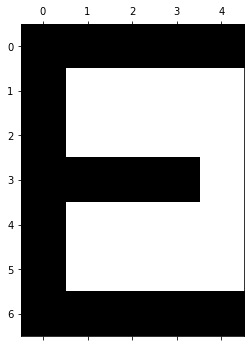

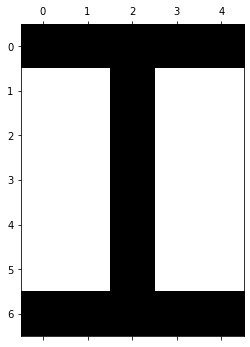

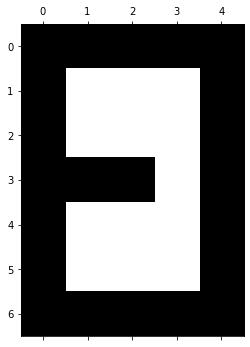

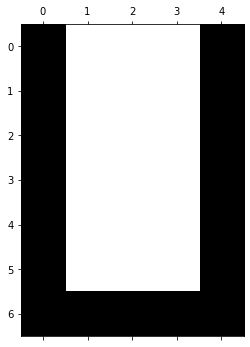

In [ ]:
# =========== graficar resultados ==========
for i in range(0,5):
  plt.matshow(np.reshape(resultados2[i], (7, 5)), cmap=plt.cm.binary)
  plt.show()

# DATOS DE SALIDA

In [ ]:
# MOSTRAR RESULTADOS
for patron, salida in resultados_pred2:
  print("PATRON",patron)
  print( " SALIDA: ", salida, "\n")

PATRON [ 1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1  1  1  1 -1 -1 -1
  1  1 -1 -1 -1  1  1 -1 -1 -1  1]
 SALIDA:  [-1 -1 -1 -1  1] 

PATRON [ 1  1  1  1  1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1  1  1  1 -1  1 -1 -1 -1
 -1  1 -1 -1 -1 -1  1  1  1  1  1]
 SALIDA:  [-1 -1 -1  1 -1] 

PATRON [ 1  1  1  1  1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1 -1 -1 -1  1 -1
 -1 -1 -1  1 -1 -1  1  1  1  1  1]
 SALIDA:  [-1 -1  1 -1 -1] 

PATRON [ 1  1  1  1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1  1  1 -1  1  1 -1 -1 -1
  1  1 -1 -1 -1  1  1  1  1  1  1]
 SALIDA:  [-1 -1 -1 -1 -1] 

PATRON [ 1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1  1  1 -1 -1 -1
  1  1 -1 -1 -1  1  1  1  1  1  1]
 SALIDA:  [ 1 -1 -1 -1 -1] 



In [ ]:
# MOSTRAR RESULTADOS
y_pred_ = []
for patron, salida in resultados_pred2:
  y_pred_.append(salida)
  print(" SALIDA: ", salida, "\n")

 SALIDA:  [-1 -1 -1 -1  1] 

 SALIDA:  [-1 -1 -1  1 -1] 

 SALIDA:  [-1 -1  1 -1 -1] 

 SALIDA:  [-1 -1 -1 -1 -1] 

 SALIDA:  [ 1 -1 -1 -1 -1] 



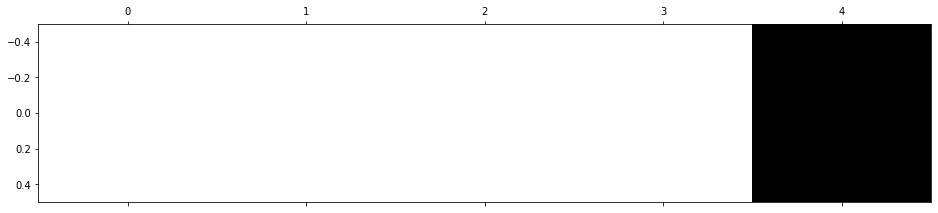

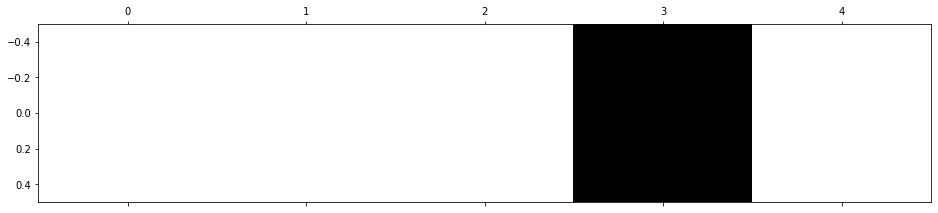

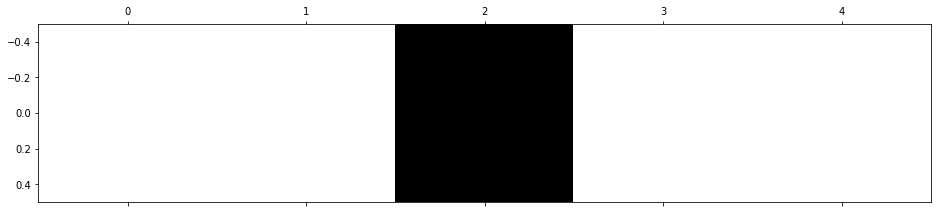

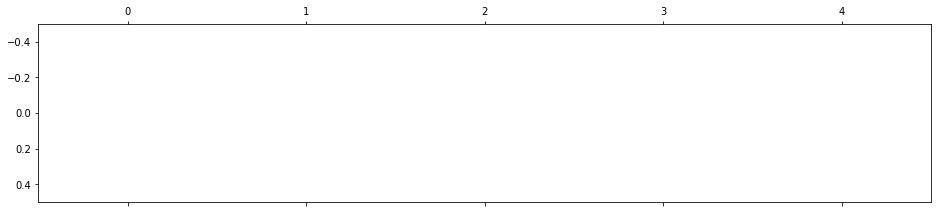

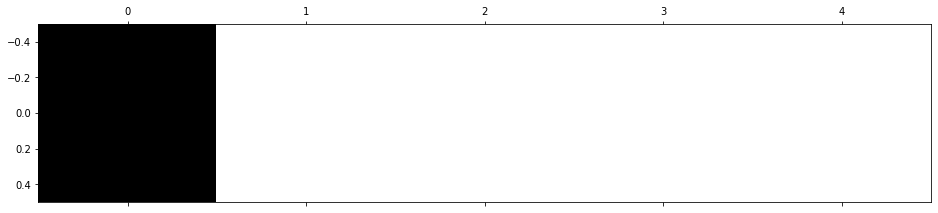

In [ ]:
# =========== graficar resultados ==========
for i in range(0,5):
  plt.matshow(np.reshape(y_pred_[i], (1, 5)), cmap=plt.cm.binary)
  plt.show()